# Prediction: Whether Customer will purchase or not

## Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time
print ("Importing librariesinto Python Environment is successful")

Importing librariesinto Python Environment is successful


## Loading the dataset

In [2]:
data = pd.read_csv("iphone_purchase_records.csv")

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


### Preliminary data exploration

In [5]:
data.shape

(400, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


#### Missing values in the dataset

In [7]:
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

#### Duplicate values in the dataset

In [8]:
data.duplicated().sum()

20

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

### Exploratory data analysis

In [11]:
data.describe()

,Age,Salary,Purchase Iphone
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Distribution of Age and salary across Gender

<Figure size 800x600 with 0 Axes>

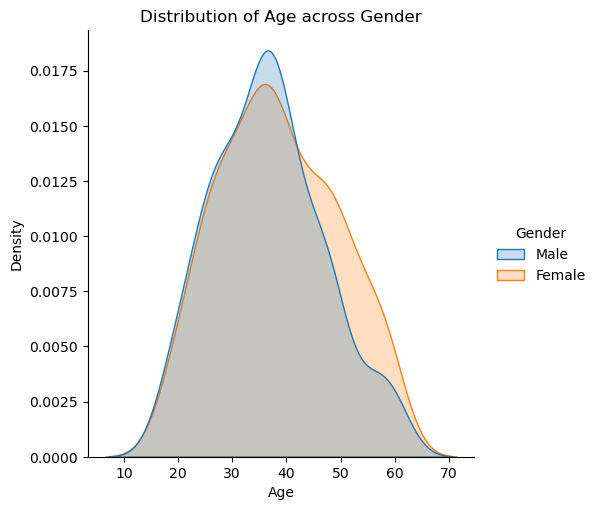

In [12]:
plt.figure(figsize = (8,6))
sns.displot(data = data, x ='Age', hue = 'Gender', kind = 'kde', fill = True)
plt.title('Distribution of Age across Gender')
plt.savefig("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/kde_age.png")
plt.show()

<Figure size 600x600 with 0 Axes>

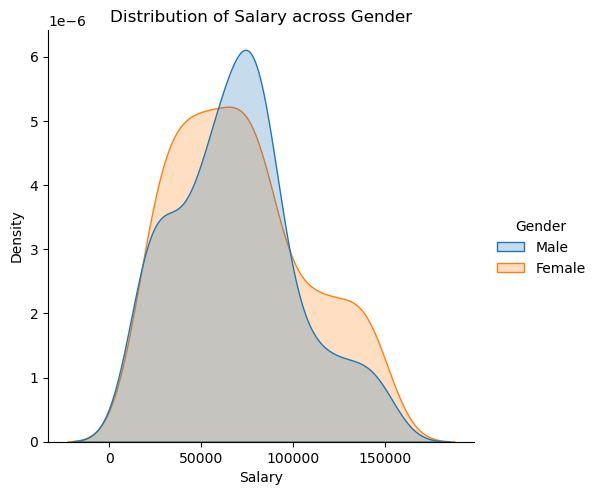

In [13]:
plt.figure (figsize = (6,6))
sns.displot(data = data, x = 'Salary', hue = 'Gender', kind = 'kde', fill = True)
plt.title ("Distribution of Salary across Gender")
plt.savefig("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/kde_salary.png")
plt.show()

#### Iphone Purchasing across Gender

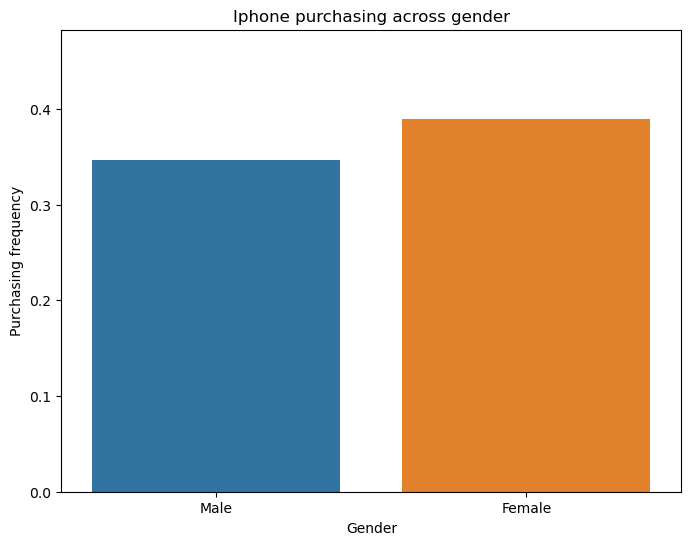

In [14]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Gender', y = 'Purchase Iphone', errwidth = 0)
plt.title ("Iphone purchasing across gender")
plt.xlabel ('Gender')
plt.ylabel('Purchasing frequency')
plt.savefig ("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/Bar plot.png")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}  # to store our label encoders for potential inverse transformation later

categorical_columns = ['Gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

### KNN Model: 3 Neighbors

In [16]:
X = data[['Age', 'Salary', 'Gender']]

In [17]:
y = data['Purchase Iphone']

In [18]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 1234)

In [19]:
X_train.shape

(304, 3)

In [20]:
X_test.shape

(76, 3)

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn_pred = knn.predict(X_test)

In [24]:
knn_accuracy = accuracy_score (y_test, knn_pred)
print (f"The accuracy of the model is:  {knn_accuracy*100:.2f}%")

The accuracy of the model is:  80.26%


In [25]:
knn_classification_report = classification_report (y_test, knn_pred)
print (knn_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        54
           1       0.61      0.86      0.72        22

    accuracy                           0.80        76
   macro avg       0.77      0.82      0.78        76
weighted avg       0.84      0.80      0.81        76



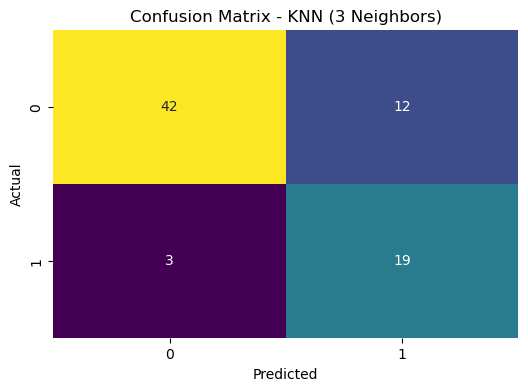

In [26]:
knn_conf = confusion_matrix(y_test, knn_pred)
plt.figure (figsize = (6,4))
sns.heatmap(data = knn_conf, annot = True, cmap = 'viridis', cbar = False)
plt.title ("Confusion Matrix - KNN (3 Neighbors)")
plt.xlabel ('Predicted')
plt.ylabel('Actual')
plt.savefig ("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/Confusion Matrix.png")
plt.show()

### KNN Model: 5 Neighbors

In [27]:
knn_2 = KNeighborsClassifier(n_neighbors = 5)

In [28]:
knn_2.fit (X_train, y_train)

KNeighborsClassifier()

In [29]:
knn_2_pred = knn_2.predict (X_test)

In [30]:
knn_2_accuracy = accuracy_score (y_test, knn_2_pred)
print (f"The accuracy of the model is:  {knn_2_accuracy*100: .2f}%")

The accuracy of the model is:   82.89%


In [31]:
knn_2_classification_report = classification_report (y_test, knn_2_pred)
print (knn_2_classification_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.68      0.77      0.72        22

    accuracy                           0.83        76
   macro avg       0.79      0.81      0.80        76
weighted avg       0.84      0.83      0.83        76



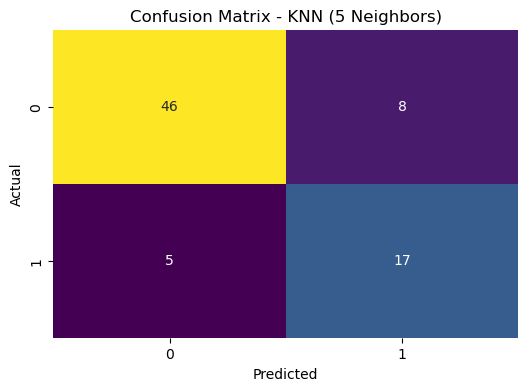

In [32]:
knn_2_conf = confusion_matrix(y_test, knn_2_pred)
plt.figure (figsize = (6,4))
sns.heatmap(data = knn_2_conf, annot = True, cmap = 'viridis', cbar = False)
plt.title ("Confusion Matrix - KNN (5 Neighbors)")
plt.xlabel ('Predicted')
plt.ylabel('Actual')
plt.savefig ("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/Confusion Matrix_2.png")
plt.show()